In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [107]:
#Physics parameters
g = 9.81
L = 1.  # Gamma/m  Gamma is the viscosity and m the mass 

In [108]:
h = 0.01
t =np.linspace(0,0.45,50)
#t

In [109]:
def System(r,t,L):
    
    theta,omega = r
    
    dtheta_dt = omega
    den = (1/3)+(np.sin(theta)*np.sin(theta))
    num =(((2*g)/(L))-((omega**2)*np.cos(theta)))*np.sin(theta) 
    domega_dt = num/den

    
    return [dtheta_dt,domega_dt]

In [110]:
def Integrator2(f,r0,t,L):
    
    h = t[1] - t[0]
    #print(h)
    
    theta = np.zeros_like(t)
    omega = np.zeros_like(t)
   
    theta[0] = r0[0]
    omega[0] = r0[1]
    
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    
    # Las pendientes instantaneas
    R = np.zeros(2)

    for i in range(1,len(t)):
        
        R = np.array([theta[i-1],omega[i-1]])
        
        K1 = f(R,t[i-1],L)#Funcion evaluada en el presente por eso t[i-1]
        #Se actualiza R pra calcular f en x+hk1, y +hk1, z+hk1
        R = np.array([theta[i-1]+h*K1[0],omega[i-1]+h*K1[1]])
        
        K2 = f(R,t[i-1]+h,L)# Al t del presente le añado el paso para avanzar
        
        theta[i] = theta[i-1] + 0.5*h*(K1[0]+K2[0])
    
        omega[i] = omega[i-1] + 0.5*h*(K1[1]+K2[1])

        
    return theta, omega

In [111]:
r0 = [((10*2*np.pi)/180),0]

In [112]:
theta, omega = Integrator2(System,r0,t,L)

'r= integrate.odeint(System,r0,t,args=(L,))\nplt.scatter((L/2)*np.sin(r[:, 0]),(L/2)*np.cos(r[:, 0]))\n'

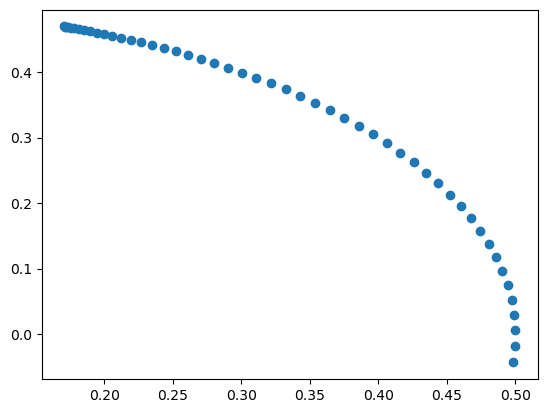

In [113]:
plt.scatter((L/2)*np.sin(theta),(L/2)*np.cos(theta))
#plt.scatter((L/2)*np.sin(omega),(L/2)*np.cos(omega))

"""r= integrate.odeint(System,r0,t,args=(L,))
plt.scatter((L/2)*np.sin(r[:, 0]),(L/2)*np.cos(r[:, 0]))
"""

In [114]:
def findTime(theta, t, error): 
    i = 0 
    time = 0 
    for th in theta:
        if (np.pi/2)-error<=th and th<=(np.pi/2)+error: 
            time = t[i]
            break         
        i+=1
    return time
        
tiempoCaida = findTime(theta, t, 0.1)

print("El tiempo de caida es {} segundos".format(tiempoCaida))
            
            

El tiempo de caida es 0.42244897959183675 segundos


In [115]:
#plt.plot(t,vy)